In [1]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
%pwd

'F:\\neel\\fingertips\\python\\jupyternotbook'

In [3]:
data = pd.read_excel('F:\\neel\\fingertips\\python\\jupyternotbook\\Python_Clustering_K_.xlsx')

In [4]:
data

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [5]:
data.shape

(22, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        22 non-null     int64
 1   Income($)  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


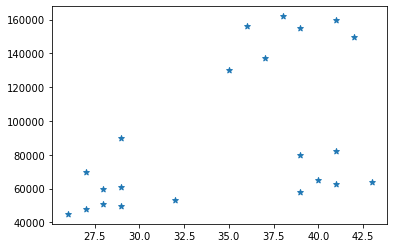

In [9]:
plt.scatter(data['Age'],data['Income($)'],marker="*")

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income($)'}>]], dtype=object)

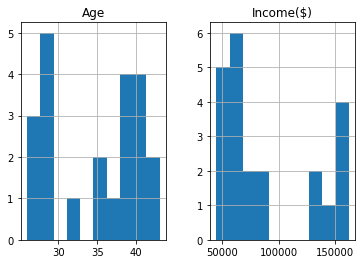

In [10]:
data.hist()

In [11]:
#make cluster
model = KMeans(n_clusters=3)
predict = model.fit_predict(data[['Age','Income($)']])

In [12]:
predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [13]:
data['cluster'] = predict

In [14]:
data

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


In [15]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [16]:
model.cluster_centers_[:,1]

array([ 80500.        , 150000.        ,  56136.36363636])

In [17]:
data[data['cluster']==0]

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
19,39,80000,0
20,41,82000,0


In [18]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

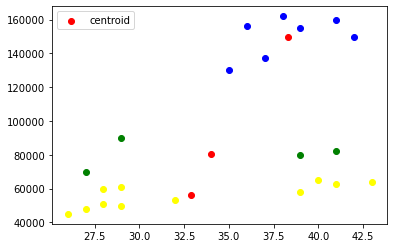

In [21]:
plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color="blue")
plt.scatter(data3['Age'],data3['Income($)'],color="yellow")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="red",label='centroid')
plt.legend()

# silhouette_score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [23]:
from sklearn.metrics import silhouette_score

In [24]:
score = silhouette_score(data,predict)

In [25]:
score

0.6555650953729437

In [26]:
from scipy.cluster.hierarchy import linkage,dendrogram

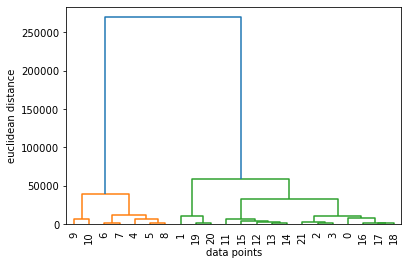

In [31]:
merg = linkage(data,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
predict_a = model.fit_predict(data[['Age','Income($)']])

In [33]:
predict_a

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int64)

In [34]:
data['cluster2'] =predict_a

In [35]:
data

,Age,Income($),cluster,cluster2
0,27,70000,0,1
1,29,90000,0,2
2,29,61000,2,1
3,28,60000,2,1
4,42,150000,1,0
5,39,155000,1,0
6,41,160000,1,0
7,38,162000,1,0
8,36,156000,1,0
9,35,130000,1,0


In [38]:
score = silhouette_score(data,predict_a)
score

0.6817458573637467

In [49]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
sse

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 238167028.08333337,
 177967003.7952381,
 119633613.78333332,
 93500268.41666666]

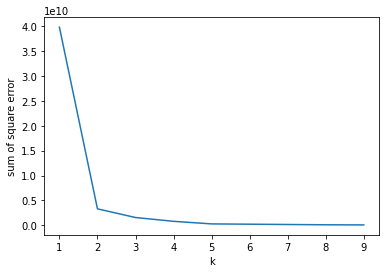

In [51]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)